In [33]:
import numpy as np
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline


# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display


In [5]:
# Beat tracking example
from __future__ import print_function
import librosa

# 1. Get the file path to the included audio example
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(r"C:\Users\Vishal_Oben\about_time.wav")

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

print('Saving output to beat_times.csv')
librosa.output.times_csv('beat_times.csv', beat_times)

Estimated tempo: 89.10 beats per minute
Saving output to beat_times.csv


In [36]:
print(len(y))

57600


In [3]:
def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=18)
    plt.show()

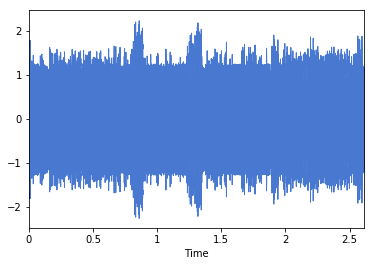

In [6]:
librosa.display.waveplot(np.array(y),sr=22050)

57600
22050


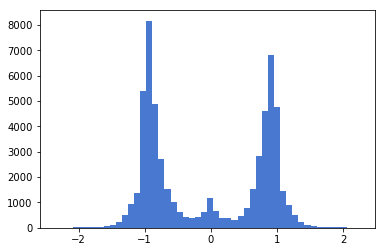

In [7]:
print(len(y))
print(sr)
import matplotlib.pyplot as plt 
plt.hist(y,bins=50)
plt.show()


In [17]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

In [18]:
x=extract_feature(r"C:\Users\Vishal_Oben\about_time.wav")

In [32]:
for i in x:
    print(i)
    print(len(i))


[  70.26034961  196.65270271 -117.06163878   87.90968737  -28.02596658
   -0.78963515   28.40061889  -38.08917839   27.31399242  -13.26125851
   -0.77412714   19.36909696  -20.19877459   17.69247237   -5.87789353
   -4.20625566   10.9491395   -15.04107017    9.93274035   -4.8390487
   -3.41141954    9.42625766  -10.97813605    6.52607748   -3.06047605
   -4.44785917    4.58976461   -9.83322794    3.5273826    -3.77378476
   -4.23672748    4.70135731   -6.23881607    4.24495692   -0.23707228
   -1.51469134    4.14511289   -5.27262537    2.65052153   -1.45204444]
40
[ 0.76001088  0.77151295  0.81659362  0.87011415  0.79100086  0.72558897
  0.70628724  0.70178075  0.6858338   0.68845411  0.69035273  0.72368524]
12
[  2.40232382e+02   1.38190132e+03   1.76719726e+03   9.57953090e+02
   9.14818511e+02   6.84197766e+02   6.17446625e+02   3.79752668e+02
   4.19877799e+02   5.57484178e+02   3.36088882e+02   3.60095832e+02
   4.17221946e+02   4.62690139e+02   6.79141989e+02   5.10354628e+02
   

In [34]:
log_S = librosa.logamplitude(S, ref_power=np.max)

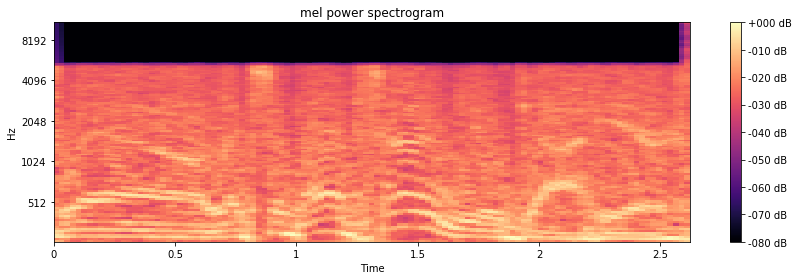

In [38]:
# Make a new figure
plt.figure(figsize=(12,4))
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+04.0f dB')

# Make the figure layout compact
plt.tight_layout()
